<a id='ReturntoTop'></a>


<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>NLP with Steam Video Game Reviews</h1>
      <h3>Notebook 3 - Data Splitting and Tokenization </h3>
      <p>Author: David Lappin | Date: 5/12/2023 - */**/2023 </p>
    </div>
    <img src="bannerphoto/banner.jpg" alt="your-image-description" style="height:225px; margin-left:50px; border: 8px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose

# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Blank](#3)

[Blank](#4)

[Blank](#5)


# Packages Import
<a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**train_test_split** - used to split data set into training/validation/and testing sets




In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sk_metrics


#tokenization and splitting
from sklearn.model_selection import train_test_split

#processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#optimization 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


#misc
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filter out ConvergenceWarning 
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Data Import
[Return to Top](#ReturntoTop)
<a id='2'></a>

Import the reviews csv and explore some of the data within:

In [4]:
#import data

train_df = pd.read_csv('data/train_df.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Columns: 1046 entries, user_suggestion to yu
dtypes: int64(1046)
memory usage: 84.5 MB


Data set is the same dimensions as before. Let's just look at the first few rows:

In [6]:
train_df.head(5)

,user_suggestion,abilities,ability,able,absolute,absolutely,access,account,across,action,...,wrong,ww,xp,yeah,year,years,yes,yet,youtube,yu
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Everything looks good we can move on to splitting the training set into training and validation data and then begin with some baseline models:

# Logistic Regression
<a id='pt1'></a>
[Return to Top](#ReturntoTop)

Lets start by running a classic and simpler model. Logistic regression is well suited for binary classification problems such as sentiment analysis and will be a simple and computationally efficient method to start off with. We will split the data and then start.

In [8]:
# store data in X and y

#all rows or tokens not including the target variable 
X = train_df.loc[:, train_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y = train_df['user_suggestion']

In [10]:
#Split out 20 percent of the data to validation set and maintain the rest in the train set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = train_df['user_suggestion'], random_state=7)

We can confirm once again that the data was stratified correctly:

In [22]:
#unsplit data

print(f"The negative to positive ratio for the unsplit data is: {round((len(train_df['user_suggestion']) - train_df['user_suggestion'].sum()) / train_df['user_suggestion'].sum(), 5)}")
print('\n')

#train set split

print(f"The negative to positive ratio for the train split is: {round((len(y_train) - y_train.sum()) / y_train.sum(), 5)}") 
print('\n')

#test set split

print(f"The negative to positive ratio for the test split is: {round((len(y_val) - y_val.sum()) / y_val.sum(), 5)}") 


The negative to positive ratio for the unsplit data is: 0.76136


The negative to positive ratio for the train split is: 0.76139


The negative to positive ratio for the test split is: 0.76123


### Observations:

Looks like everything worked and the ratio of positive to negative reviews has been preserved in both the training and the validation splits. 

Let's instantiate and split our first model:

**Note:** We will start with a relatively low max iteration value and we can increase this with further optimization in the future if desired.

In [60]:
# Instantiate a model
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10) 

#Fit the model
logreg.fit(X_train, y_train)
    
# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Validation score: {logreg.score(X_val, y_val)}")

Train score: 0.8367780796031652
Validation score: 0.8238072744449693


### Observations

With a pretty simple model we were able to achieve  

In [50]:
#determine optimal value for max_iter. Note this may take a moment to run

train_acc = []
val_acc = []

for i in np.arange(0, 100, 2):

# Fitting a model
    logreg = LogisticRegression(solver = 'lbfgs', max_iter = i) 
    logreg.fit(X_train, y_train)
    
    train_acc.append(logreg.score(X_train, y_train))
    val_acc.append(logreg.score(X_val, y_val))

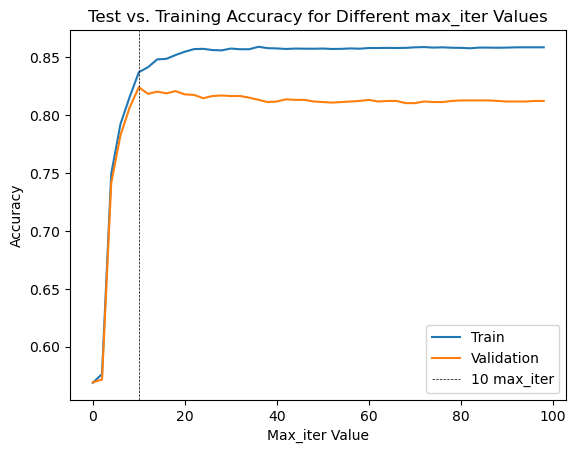

In [56]:
#plot the testing accuracies for the different max_iter values

xvals = np.arange(0, 100, 2) #original range of max_iter values

#plot
plt.figure()
plt.plot(xvals, train_acc, label = 'Train')
plt.plot(xvals, val_acc, label = 'Validation')
plt.axvline(10, color = 'black', label = '10 max_iter', linewidth = 0.5, linestyle = '--')
plt.xlabel('Max_iter Value')
plt.ylabel('Accuracy')
plt.title('Test vs. Training Accuracy for Different max_iter Values')
plt.legend() 
plt.show()

In [57]:
test_df = pd.read_csv('data/test_df.csv')

In [64]:
#all rows or tokens not including the target variable 
X_test = test_df.loc[:, test_df.columns != 'user_suggestion']

#user suggestion is the target variable 
y_test = test_df['user_suggestion']

In [65]:
print(f"Test score: {logreg.score(X_test, y_test)}")

Validation score: 0.8071367884451996


------------------------------------------------------------------------------------------------------------------------------

# Summary and Next Steps:
<a id='7'></a>
[Return to Top](#ReturntoTop)

**From the Data Splitting and Tokenization we found the following out and completed the following tasks for our dataset:**
- Utilized the cleaning tools from the previous notebook to clean our data set
- Tokenized our data set using a BoW model. Used a `min_df` of 0.01 to remove tokens that were present in less than 1% of reviews. This helped to reduce our dimensionality. 
 

**Next Steps: (Baseline Modeling)**
- Next we will explore various modeling techniques and evaluate some of the best options for predicting sentiment analysis in this data set

    

### Next steps are located in the Third Notebook - '4.0_Baseline_Modeling'